<a href="https://colab.research.google.com/github/Danielmalenga/Lista2-Daniel-Malenga/blob/main/Exec09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

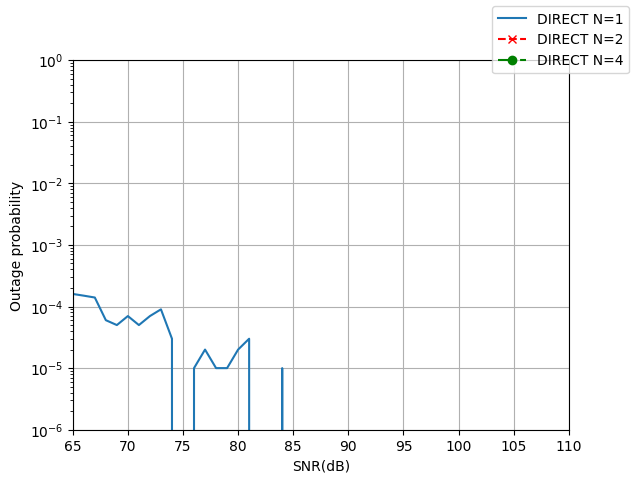

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import special
from scipy import signal
from scipy.stats import nakagami
import random
# Constants
N =100000
f = 300e9  # THz carrier frequency (Hz)
G = 10e4 # Antenna gains (40dBi)
c = 3e8
k = 3.18e-4  # Molecular absorption coefficient (per meter)
d1 = 5  # Distance from source to RIS (m)
d2 = 25  # Distance from RIS to destination (m)
noise_floor = 39.811e-3   # Noise floor (-74dBm)
bandwidth = 10e9  # Channel bandwidth (Hz)


alpha_1 = 2  # Alpha parameter for path 1
mu_1 = 1  # Mu parameter for path 1
alpha_2 = 2  # Alpha parameter for path 2
mu_2 = 2  # Mu parameter for path 2

calculate_path_gain = ((c*G)/ (4*np.pi*f*(d1+d2)))*np.exp(-0.5*k* (d1+d2))



d=30
media=d**(-alpha_2)
lambda1=1/media


R=3
count=0
i=0
j=0
OP1=[]
OP2=[]
OP4=[]
N0=0.1
for j in np.arange(65,111,1):
    count=0
    plin=10**(j/10)
    r = np.sqrt(media)*nakagami.rvs(1, size=N)
    r2 = np.sqrt(media) * nakagami.rvs(2, size=N)
    r4 = np.sqrt(media) * nakagami.rvs(4, size=N)

    Prob1 = np.sum(np.log2(1 + (r**2 * plin / N0)) < R) / N
    Prob2 = np.sum(np.log2(1 + (r2 ** 2 * plin / N0)) < R) / N
    Prob4 = np.sum(np.log2(1 + (r4 ** 2 * plin / N0)) < R) / N
    OP1= np.append(OP1,Prob1)
    OP2 = np.append(OP2, Prob2)
    OP4 = np.append(OP4, Prob4)


Pdb=np.arange(65,111,1)
plt.semilogy(Pdb,OP1)
plt.semilogy(Pdb,OP2,'rx--')
plt.semilogy(Pdb,OP4,'go-.')
plt.grid()
plt.axis([65,110,1e-6,1])
plt.xlabel('SNR(dB)')
plt.ylabel('Outage probability')
plt.figlegend(['DIRECT N=1','DIRECT N=2','DIRECT N=4'])
plt.show()